In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from birds import infer
from birds.models import StochVolSimulator, StochVolPrior
import zuko
import torch

import matplotlib.pyplot as plt

In [3]:
device = "cpu"

In [4]:
n_params = 2
flow = zuko.flows.NSF(n_params, 1, transforms=3, hidden_features=[128] * 3)
flow = flow.to(device)

In [5]:
model = StochVolSimulator(sigma=0.0, T=100)

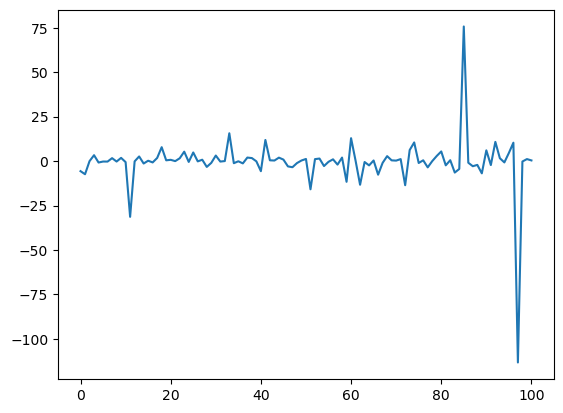

In [6]:
true_parameters = torch.tensor([1., 50.])
#true_parameters = torch.tensor([0.5, 20])
obs_data = model.forward(true_parameters)
plt.plot(obs_data[0]);

In [7]:
#prior = StochVolPrior()
prior = torch.distributions.MultivariateNormal(torch.tensor([1., 30.]), 10 * torch.eye(2))

In [8]:
infer(model=model,
    flow = flow,
    prior = prior,
    obs_data = obs_data,
    n_epochs = 10000,
    n_samples_per_epoch = 10,
    n_samples_regularization = 1000,
    w = 0.5,
    save_dir = "./results",
    learning_rate = 1e-3,
    loss = "MSELoss",
    true_values = true_parameters.cpu().numpy(),
    save_best_posteriors = True,
    device=device,
    lims=[(0, 5), (0, 100)]
)

100%|██████████| 10000/10000 [20:26:54<00:00,  7.36s/it]    
